<a href="https://colab.research.google.com/github/CAVASOL/aiffel_quest/blob/main/ML_node/ML_with_Python_Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Unsupervised Learning**
1. PCA
2. Clustering  
    1) K-Means Clustering  
    2) Dendrogram, Hierarchical Clustering  

**PCA, Principal Component Analysis**
* a representative method of dimensionality reduction
* Linear projection technique to reduce from high dimension to low dimension
* 데이터의 차원이 증가할 수록 거리가 증가하고, 오버피팅 가능성이 커진다

* PCA process
    * AX1, 데이터에서 분산이 최대인 축
    * AX2, 첫 번째 축과 직교하면서 분산이 최대인 축
    * AX3, 첫 번째와 두 번째 축에 직교하고 분산이 최대인 축

In [ ]:
# Lib
import pandas as pd
from sklearn.datasets import load_wine
dataset = load_wine()
data = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [ ]:
print(data.shape)
data.head()

(178, 13)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
# Data Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(data)
data[:3]

array([[ 1.51861254, -0.5622498 ,  0.23205254, -1.16959318,  1.91390522,
         0.80899739,  1.03481896, -0.65956311,  1.22488398,  0.25171685,
         0.36217728,  1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, -2.49084714,  0.01814502,
         0.56864766,  0.73362894, -0.82071924, -0.54472099, -0.29332133,
         0.40605066,  1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, -0.2687382 ,  0.08835836,
         0.80899739,  1.21553297, -0.49840699,  2.13596773,  0.26901965,
         0.31830389,  0.78858745,  1.39514818]])

In [ ]:
# Data copy
df = data.copy()

**PCA**

In [ ]:
# PCA
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)

In [ ]:
df = pca.fit_transform(df)

In [ ]:
df.shape

(178, 2)

In [ ]:
df[:3]

array([[ 3.31675081, -1.44346263],
       [ 2.20946492,  0.33339289],
       [ 2.51674015, -1.0311513 ]])

**PCA 2차원 시각화**

In [ ]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [ ]:
df = pd.DataFrame(df)
df.head()

,0,1
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


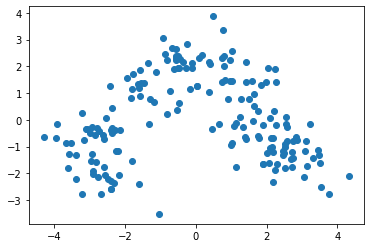

In [ ]:
# scatter
plt.scatter(df.iloc[:,0], df.iloc[:,1])

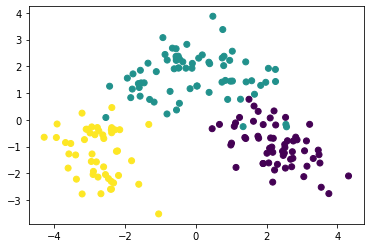

In [ ]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=dataset.target)

In [ ]:
# Explaining data(%)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.36198848 0.1920749 ]
0.5540633835693534


**Supervised Learning (Comparing b4after PCA)**

In [ ]:
# After PCA, preprocessing 2
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(random_state=2022)
cross_val_score(model, df, dataset.target, scoring='accuracy', cv=5).mean()

0.9492063492063492

In [ ]:
# Before PCA, preprocessing 13
cross_val_score(model, data, dataset.target, scoring='accuracy', cv=5).mean()

0.9553968253968254

**PCA 3차원 시각화**

In [ ]:
# New data
df = data.copy()

In [ ]:
# PCA
pca = PCA(n_components=3)

In [ ]:
# PCA transform
df = pca.fit_transform(df)

In [ ]:
# Dataframe transform
df = pd.DataFrame(df)

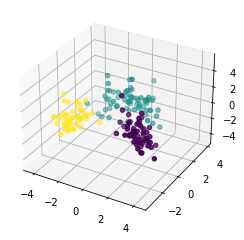

In [ ]:
# Lib
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.iloc[:,0], df.iloc[:,1], df.iloc[:,2], c=dataset.target)

**점진적 PCA**
* 데이터셋이 큰 경우 배치를 통해 점진적으로 수행  

In [ ]:
# Lib
from sklearn.decomposition import IncrementalPCA

In [ ]:
# Data copy
df = data.copy()

In [ ]:
# IncrementalPCA
pca = IncrementalPCA(n_components=2, batch_size=16)

In [ ]:
# Transform
df = pca.fit_transform(df)

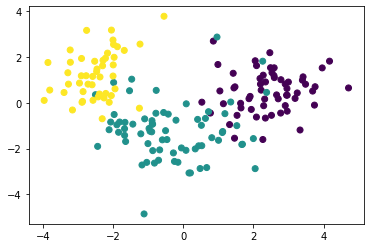

In [ ]:
# Visualization
df = pd.DataFrame(df)
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=dataset.target)

In [ ]:
# Explaining data(%)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.3400206  0.15239134]
0.49241194001543964


**희소 PCA**
* 오버피팅 방지  
* 적절한 희소성을 유지, alpha 값으로 조정  

In [ ]:
# Lib
from sklearn.decomposition import SparsePCA

In [ ]:
# Data copy
df = data.copy()

In [ ]:
# SparsePCA
pca = SparsePCA(n_components=2, alpha=0.01)

In [ ]:
# Transform
df = pca.fit_transform(df)

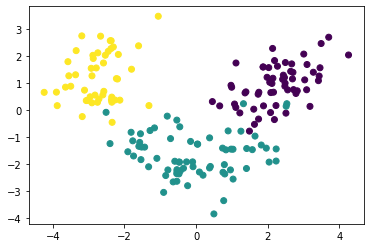

In [ ]:
# Visualization
df = pd.DataFrame(df)
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=dataset.target)

**커널 PCA**
* 비선형으로 차원 축소  

In [ ]:
# Lib
from sklearn.decomposition import KernelPCA

In [ ]:
# Data copy
df = data.copy()

In [ ]:
# SparsePCA
pca = KernelPCA(n_components=2)

In [ ]:
# Transform
df = pca.fit_transform(df)

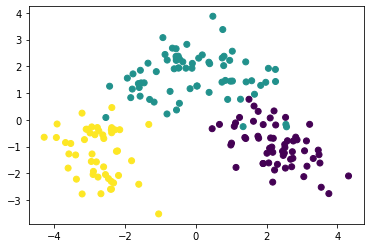

In [ ]:
# Visualization
df = pd.DataFrame(df)
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=dataset.target)

**SVD(Singular Value Decomposition)**

In [ ]:
# Lib
from sklearn.decomposition import TruncatedSVD

In [ ]:
# Data copy
df = data.copy()

In [ ]:
# TruncatedSVD
svd = TruncatedSVD(n_components=2)

In [ ]:
# Transform
df = svd.fit_transform(df)

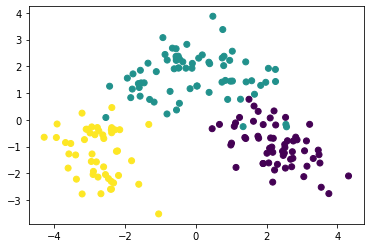

In [ ]:
# Visualization
df = pd.DataFrame(df)
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=dataset.target)

In [ ]:
# # 2D
# df = data.copy()
# pca = PCA(n_components=2)
# df = pca.fit_transform(df)
# df = pd.DataFrame(df)

# model = RandomForestClassifier(random_state=2022)
# print("2D PCA:")
# print(cross_val_score(model, df, dataset.target, scoring='accuracy', cv=5).mean())


# # 3D
# df = data.copy()
# pca = PCA(n_components=3)
# df = pca.fit_transform(df)
# df = pd.DataFrame(df)

# model = RandomForestClassifier(random_state=2022)
# print("3D PCA:")
# print(cross_val_score(model, df, dataset.target, scoring='accuracy', cv=5).mean())


# # 4D
# df = data.copy()
# pca = PCA(n_components=4)
# df = pca.fit_transform(df)
# df = pd.DataFrame(df)

# model = RandomForestClassifier(random_state=2022)
# print("4D PCA:")
# print(cross_val_score(model, df, dataset.target, scoring='accuracy', cv=5).mean())

# # 5D
# df = data.copy()
# pca = PCA(n_components=5)
# df = pca.fit_transform(df)
# df = pd.DataFrame(df)

# model = RandomForestClassifier(random_state=2022)
# print("5D PCA:")
# print(cross_val_score(model, df, dataset.target, scoring='accuracy', cv=5).mean())

# # 6D
# df = data.copy()
# pca = PCA(n_components=6)
# df = pca.fit_transform(df)
# df = pd.DataFrame(df)

# model = RandomForestClassifier(random_state=2022)
# print("6D PCA:")
# print(cross_val_score(model, df, dataset.target, scoring='accuracy', cv=5).mean())

**Clustering**

* 군집분석은 유사성이 높은 대상의 집단을 분류하는 부석 방법  
* 계층적 군집분석과 비계층적 군집분석  
    * 전통적인 계층적 군집분석은 군집의 개수가 나중에 선정함
    * 비계층적 군집분석인 K-means는 군집의 수를 가장 먼저 선정함  
    * K-means 군집분석은 초기 중심 값은 임의로 선정하며, 중심 값이 이동함  
* 군집분석의 평가지표  
    * Silhouette, Dunn Index, etc.

**K-means(centroid)**
* 임의의 지점 K개를 선택하여 해당 중심에서 가까운 데이터를 군집화 하는 기법
* n_clusters  

In [ ]:
# Lib
from sklearn.cluster import KMeans

In [ ]:
# Data
from sklearn.datasets import load_wine
dataset = load_wine()
data = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df = data.copy()

In [ ]:
# Kmeans 선언 및 학습
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

KMeans(n_clusters=3)

In [ ]:
# Kmeans 예측
pred = kmeans.predict(df)
pred

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0], dtype=int32)

In [ ]:
# 실제값과 예측값 비교
df['target'] = dataset.target
df['pred'] = pred
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,pred
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2,2


**PCA -> Clustering -> Visualization**

In [ ]:
# PCA
df = data.copy()
pca = PCA(n_components=2)
df = pca.fit_transform(df)
df = pd.DataFrame(df)
df.head()

,0,1
0,318.562979,21.492131
1,303.097420,-5.364718
2,438.061133,-6.537309
3,733.240139,0.192729
4,-11.571428,18.489995


In [ ]:
# Kmeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)
pred = kmeans.predict(df)
df['K-means'] = pred
df

,0,1,K-means
0,318.562979,21.492131,1
1,303.097420,-5.364718,1
2,438.061133,-6.537309,1
3,733.240139,0.192729,1
4,-11.571428,18.489995,2
...,...,...,...
173,-6.980211,-4.541137,2
174,3.131605,2.335191,2
175,88.458074,18.776285,2
176,93.456242,18.670819,2


In [ ]:
# Centroid
centroid = kmeans.cluster_centers_

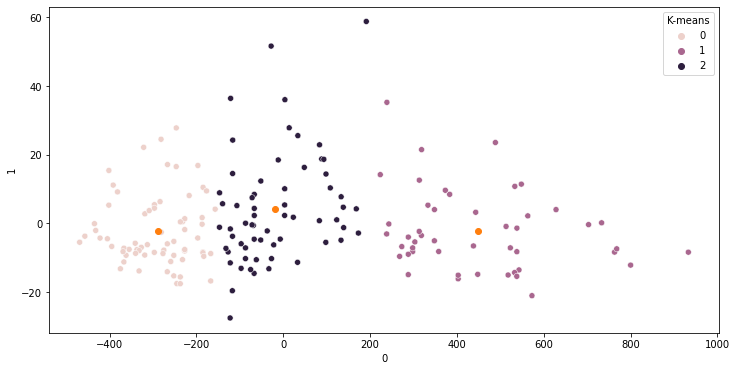

In [ ]:
# Visualization
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.scatterplot(x=df.iloc[:,0], y=df.iloc[:,1], hue=df['K-means'])
plt.scatter(centroid[:,0], centroid[:,1])

**Elbow method, 클러스터의 개수를 찾는 방법**

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklea

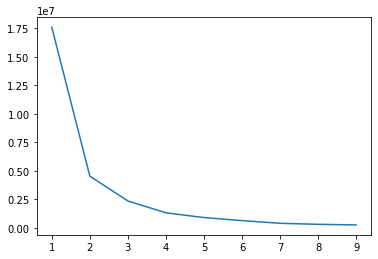

In [ ]:
inertia = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=2022)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia)

**Dendrogram**

In [ ]:
# Lib
from scipy.cluster.hierarchy import dendrogram, ward

In [ ]:
# PCA
df = data.copy()
pca = PCA(n_components=2)
df = pca.fit_transform(df)
df = pd.DataFrame(df)

In [ ]:
kdata = df[:3].copy()
kdata = kdata.append(df[70:73])
kdata = kdata.append(df[160:163])
kdata

,0,1
0,318.562979,21.492131
1,303.097420,-5.364718
2,438.061133,-6.537309
70,123.130138,1.059835
71,-337.104122,-7.623855
72,-275.096026,-7.753152
160,-227.068836,-7.618630
161,-66.755431,8.470290
162,-176.765098,9.473190


In [ ]:
# Sampling
# dataset.target[:3] - array([0, 0, 0])

In [ ]:
# dataset.target[70:73] - array([1, 1, 1])

In [ ]:
# dataset.target[160:163] - array([2, 2, 2])

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [35.0, 35.0, 52.5, 52.5],
  [75.0, 75.0, 85.0, 85.0],
  [43.75, 43.75, 80.0, 80.0],
  [12.5, 12.5, 61.875, 61.875]],
 'dcoord': [[0.0, 30.991512411471362, 30.991512411471362, 0.0],
  [0.0, 147.877877959848, 147.877877959848, 30.991512411471362],
  [0.0, 48.02737852215087, 48.02737852215087, 0.0],
  [0.0, 88.07194000276101, 88.07194000276101, 48.02737852215087],
  [0.0, 135.87135248973354, 135.87135248973354, 88.07194000276101],
  [0.0, 190.03011431770972, 190.03011431770972, 0.0],
  [135.87135248973354,
   461.0158736911475,
   461.0158736911475,
   190.03011431770972],
  [147.877877959848, 1026.396544382853, 1026.396544382853, 461.0158736911475]],
 'ivl': ['2', '0', '1', '4', '8', '5', '6', '3', '7'],
 'leaves': [2, 0, 1, 4, 8, 5, 6, 3, 7],
 'color_list': ['C1', 'C1', 'C2', 'C2', 'C2', 'C2', 'C2', 'C0'],
 'leaves_color_list': ['C1', 'C1', 'C1', 'C2', 'C2', 'C2', 'C

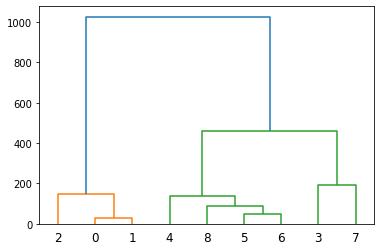

In [ ]:
# Validate
linkage = ward(kdata)
dendrogram(linkage)